## <span style="color:red"> Version antérieure à la mise à jour du 29 Mars 2023 </span>

<div style=" background-color: RGB(10,100,100);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">PROJET 4 DATA ANALYST</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Réaliser une étude de santé publique avec R ou Python
</h2>
</div>

<div style=" background-color: RGB(10,100,100);" >

<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Enjeux : Réalisez une étude de grande ampleur sur le thème de la sous-nutrition dans le monde.</h1>
<h2 style="margin: auto; padding: 20px; color:#fff;"> Importation des librairies, chargement des fichiers CSV et nettoyages des donnée </a>
<h2 style="margin: auto; padding: 20px; color:#fff;">Plan d'étude :</a>   
<h3 style="margin: auto; padding: 20px; color:#fff;">I. Demandes formulées par Marc pour l'année 2017</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">I.1. Proportion de personnes en état de sous-nutrition </a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">I.2.Nombre théorique de personnes pouvant être nourris. Le calculer à partir de la disponibilité alimentaire mondiale</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">I.3. Calculer la disponibilité alimentaire des produits végétaux</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">I.4.Déterminer l'utilisation de la disponibilité intérieur </a>  
<h3 style="margin: auto; padding: 20px; color:#fff;">II. Demandes formulées par Mélanie pour chacun des pays</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">II.1. Pays où la proportion de personnes sous alimentées est la plus forte en 2017 </a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">II.2. Pays qui ont bénéficié le plus d'aide en 2013 </a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">II.3. Pays ayant le plus/le moins de disponibilité par habitants </a>  
<h3 style="margin: auto; padding: 20px; color:#fff;">III. Obervations et remarques de Julien</a>  
<h3 style="margin: auto; padding: 20px; color:#fff;">Utilisation étonnante de certaines denrées alimentaire: l'exemple des céréales et du manioc</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">III.1. Etude sur l'utilisation des céréales</a>  
<h4 style="margin: auto; padding: 20px; color:#fff;">III.2. Etude sur l'utilisation du manioc en Thailande</a>  

</div>

<div style="background-color: RGB(10,100,100) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape 1 - Importation des librairies et chargement des données</a> 
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> 1.1 - Importation des librairies </a></h3>
</div>

In [1]:
#Importation des librairies numpy et panda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<div style="border: 5px solid RGB(0,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(0,100,100); "> 1.2 - Importation des fichiers CSV et inspection des données </a></h3>
</div>

### Importation du fichier "aide_alimentaire" et inspection de ses données

In [2]:
#Importation fichier csv "aide_alimentaire"
aide_alimentaire=pd.read_csv('aide_alimentaire.csv')
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [3]:
#Vérifier les types de chaque colonnes, les valeurs non-nulles, la taille du dataframe "aide_alimentaire"
aide_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1475 entries, 0 to 1474
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Pays bénéficiaire  1475 non-null   object
 1   Année              1475 non-null   int64 
 2   Produit            1475 non-null   object
 3   Valeur             1475 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 46.2+ KB


In [4]:
#Renommer la colonne "Valeur" en "Qtité Aide en tonne"
aide_alimentaire=aide_alimentaire.rename(columns={'Valeur':'Qtité Aide en tonne'})

In [5]:
aide_alimentaire.describe()

,Année,Qtité Aide en tonne
count,1475.000000,1475.000000
mean,2014.054237,7481.966780
std,0.946916,23339.531424
min,2013.000000,0.000000
25%,2013.000000,287.500000
50%,2014.000000,1178.000000
75%,2015.000000,4334.500000
max,2016.000000,265013.000000


### Importation du fichier "population" et inspection de ses données

In [6]:
#Importation fichier csv "population"
population=pd.read_csv('population.csv')
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [7]:
#Vérifier les types de chaque colonnes, les valeurs non-nulles, la taille du dataframe "population"
population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    1416 non-null   object 
 1   Année   1416 non-null   int64  
 2   Valeur  1416 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 33.3+ KB


In [8]:
#Dans le dataframe "population", la population est exprimée en millier d'habitants => Convertir les milliers en million
population['Valeur'] = population['Valeur']*1000
population

,Zone,Année,Valeur
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
...,...,...,...
1411,Zimbabwe,2014,13586707.0
1412,Zimbabwe,2015,13814629.0
1413,Zimbabwe,2016,14030331.0
1414,Zimbabwe,2017,14236595.0


In [9]:
#Renommer colonne 'Valeur' en colonne 'Population'
population=population.rename(columns={'Valeur':'Population'})
population

,Zone,Année,Population
0,Afghanistan,2013,32269589.0
1,Afghanistan,2014,33370794.0
2,Afghanistan,2015,34413603.0
3,Afghanistan,2016,35383032.0
4,Afghanistan,2017,36296113.0
...,...,...,...
1411,Zimbabwe,2014,13586707.0
1412,Zimbabwe,2015,13814629.0
1413,Zimbabwe,2016,14030331.0
1414,Zimbabwe,2017,14236595.0


In [10]:
#Aperçu statistique de la population mondiale
population.describe()

,Année,Population
count,1416.000000,1.416000e+03
mean,2015.500000,3.144793e+07
std,1.708428,1.300812e+08
min,2013.000000,7.930000e+02
25%,2014.000000,3.783410e+05
50%,2015.500000,5.126480e+06
75%,2017.000000,1.930666e+07
max,2018.000000,1.427648e+09


### Importation du fichier "sous_nutrition" et inspection de ses données

In [11]:
#Importation fichier csv "sous_nutrition"
sous_nutrition=pd.read_csv('sous_nutrition.csv')
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


In [12]:
#Vérifier les types de chaque colonnes, les valeurs non-nulles, la taille du dataframe "sous_nutrition" 
sous_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Zone    1218 non-null   object
 1   Année   1218 non-null   object
 2   Valeur  624 non-null    object
dtypes: object(3)
memory usage: 28.7+ KB


In [13]:
#Remplacer les valeurs string'<0.1' en '0.05' puis le convertir en type float. Mais les valeurs seront affectés par la suite 
sous_nutrition['Valeur'] = sous_nutrition['Valeur'].replace('<0.1', '0.05').astype(float)

**Les variables de la colonne "Année" du dataframe "sous_nutrition" sont de type "object" parce qu'elles représentent une intervalle de date. Pour faciliter la fusion avec les deux autres dataframe "population" et "aide_alimentaire" par la suite, ils doivent tous les trois être dans le même type.
Ce changement de type ce déroulera en 4 étapes:**

In [14]:
#Etape 1:Couper le mot composé (intervalle de date) de la colonne 'Année' et mettre les deux parties dans des colonnes différentes en utilisant la méthode 'str.split()'
sous_nutrition[['Début Année', 'Fin Année']] = sous_nutrition['Année'].str.split('-', 1, expand=True)
sous_nutrition


,Zone,Année,Valeur,Début Année,Fin Année
0,Afghanistan,2012-2014,8.6,2012,2014
1,Afghanistan,2013-2015,8.8,2013,2015
2,Afghanistan,2014-2016,8.9,2014,2016
3,Afghanistan,2015-2017,9.7,2015,2017
4,Afghanistan,2016-2018,10.5,2016,2018
...,...,...,...,...,...
1213,Zimbabwe,2013-2015,NaN,2013,2015
1214,Zimbabwe,2014-2016,NaN,2014,2016
1215,Zimbabwe,2015-2017,NaN,2015,2017
1216,Zimbabwe,2016-2018,NaN,2016,2018


In [15]:
#Etape 2:Convertir les nouvelles données 'Début Année' et 'Fin Année' en type integer
sous_nutrition[['Début Année', 'Fin Année']]=sous_nutrition[['Début Année', 'Fin Année']].astype(int)
sous_nutrition

,Zone,Année,Valeur,Début Année,Fin Année
0,Afghanistan,2012-2014,8.6,2012,2014
1,Afghanistan,2013-2015,8.8,2013,2015
2,Afghanistan,2014-2016,8.9,2014,2016
3,Afghanistan,2015-2017,9.7,2015,2017
4,Afghanistan,2016-2018,10.5,2016,2018
...,...,...,...,...,...
1213,Zimbabwe,2013-2015,NaN,2013,2015
1214,Zimbabwe,2014-2016,NaN,2014,2016
1215,Zimbabwe,2015-2017,NaN,2015,2017
1216,Zimbabwe,2016-2018,NaN,2016,2018


In [16]:
#Etape 3: Chercher les moyennes des deux dates: 'Début Année' et 'Fin Année' et les mettre dans la colonne 'Année moy' nouvellement crée
sous_nutrition ['Année moy']=round((sous_nutrition ['Début Année']+sous_nutrition['Fin Année'])/2)
sous_nutrition

,Zone,Année,Valeur,Début Année,Fin Année,Année moy
0,Afghanistan,2012-2014,8.6,2012,2014,2013.0
1,Afghanistan,2013-2015,8.8,2013,2015,2014.0
2,Afghanistan,2014-2016,8.9,2014,2016,2015.0
3,Afghanistan,2015-2017,9.7,2015,2017,2016.0
4,Afghanistan,2016-2018,10.5,2016,2018,2017.0
...,...,...,...,...,...,...
1213,Zimbabwe,2013-2015,NaN,2013,2015,2014.0
1214,Zimbabwe,2014-2016,NaN,2014,2016,2015.0
1215,Zimbabwe,2015-2017,NaN,2015,2017,2016.0
1216,Zimbabwe,2016-2018,NaN,2016,2018,2017.0


In [17]:
#Etape 4: Suppression des colonnes devenues superflues
sous_nutrition=sous_nutrition.drop(columns=['Année','Début Année','Fin Année'])
sous_nutrition

,Zone,Valeur,Année moy
0,Afghanistan,8.6,2013.0
1,Afghanistan,8.8,2014.0
2,Afghanistan,8.9,2015.0
3,Afghanistan,9.7,2016.0
4,Afghanistan,10.5,2017.0
...,...,...,...
1213,Zimbabwe,NaN,2014.0
1214,Zimbabwe,NaN,2015.0
1215,Zimbabwe,NaN,2016.0
1216,Zimbabwe,NaN,2017.0


In [18]:
#Renommer la nouvelle colonne 'Année moy' en 'Année' et 'Valeur' en 'Population sous nutris'
sous_nutrition=sous_nutrition.rename(columns={'Année moy':'Année','Valeur':'Population sous nutris'})
sous_nutrition

,Zone,Population sous nutris,Année
0,Afghanistan,8.6,2013.0
1,Afghanistan,8.8,2014.0
2,Afghanistan,8.9,2015.0
3,Afghanistan,9.7,2016.0
4,Afghanistan,10.5,2017.0
...,...,...,...
1213,Zimbabwe,NaN,2014.0
1214,Zimbabwe,NaN,2015.0
1215,Zimbabwe,NaN,2016.0
1216,Zimbabwe,NaN,2017.0


In [19]:
#Multiplier par 1000000 pour un résultat cohérent par la suite
sous_nutrition['Population sous nutris']=sous_nutrition['Population sous nutris']*1000000

In [20]:
sous_nutrition.describe()

,Population sous nutris,Année
count,6.240000e+02,1218.000000
mean,5.113462e+06,2015.500000
std,1.944832e+07,1.708527
min,5.000000e+04,2013.000000
25%,2.750000e+05,2014.000000
50%,1.100000e+06,2015.500000
75%,3.900000e+06,2017.000000
max,2.038000e+08,2018.000000


## Importation du fichier "dispo_alimentaire" et inspection de ses données

In [21]:
#Importation fichier csv "dispo_alimentaire"
dispo_alimentaire=pd.read_csv('dispo_alimentaire.csv')
dispo_alimentaire.head(60)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
5,Afghanistan,"Beurre, Ghee",animale,NaN,NaN,23.0,1.17,2.61,0.03,36.0,NaN,0.0,36.0,NaN,36.0,NaN,NaN,NaN
6,Afghanistan,Bière,vegetale,NaN,NaN,0.0,0.09,NaN,0.00,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN
7,Afghanistan,Blé,vegetale,NaN,NaN,1369.0,160.23,4.69,36.91,5992.0,NaN,1173.0,4895.0,775.0,5169.0,322.0,NaN,-350.0
8,Afghanistan,Boissons Alcooliques,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
9,Afghanistan,Café,vegetale,NaN,NaN,0.0,0.00,NaN,0.00,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [22]:
#Vérifier les types de chaque colonnes, les valeurs non-nulles, la taille du dataframe 'dispo_alimentaire'
dispo_alimentaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15605 entries, 0 to 15604
Data columns (total 18 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Zone                                                           15605 non-null  object 
 1   Produit                                                        15605 non-null  object 
 2   Origine                                                        15605 non-null  object 
 3   Aliments pour animaux                                          2720 non-null   float64
 4   Autres Utilisations                                            5496 non-null   float64
 5   Disponibilité alimentaire (Kcal/personne/jour)                 14241 non-null  float64
 6   Disponibilité alimentaire en quantité (kg/personne/an)         14015 non-null  float64
 7   Disponibilité de matière grasse en quantité (g/personne/jo

In [53]:
dispo_alimentaire.describe()

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
count,2720.000000,5496.000000,14241.000000,14015.000000,11794.000000,11561.000000,15382.000000,12226.000000,14852.000000,14015.000000,4278.000000,9180.000000,2091.000000,2292.000000,6776.000000
mean,479.501838,157.391376,34.789832,8.719368,1.283111,1.223608,640.293460,110.596925,87.264543,347.931359,106.053763,1090.379085,73.974653,961.905323,-15.407615
std,4240.119637,5076.785816,107.287655,24.618223,3.680399,3.598686,9067.267153,1053.318990,717.372714,4475.704458,1113.100416,12067.344094,528.069224,10381.795904,549.834540
min,0.000000,0.000000,-21.000000,-1.930000,-0.030000,-0.370000,-3430.000000,-41.000000,-201.000000,-246.000000,0.000000,0.000000,0.000000,-19.000000,-39863.000000
25%,0.000000,0.000000,0.000000,0.060000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,4.000000,0.830000,0.080000,0.100000,7.000000,0.000000,2.000000,5.000000,4.000000,22.000000,2.000000,6.000000,0.000000
75%,74.000000,4.000000,21.000000,5.190000,0.630000,0.660000,76.750000,9.000000,18.000000,52.000000,26.000000,191.250000,17.000000,69.000000,0.000000
max,150000.000000,347309.000000,1711.000000,430.760000,60.760000,54.970000,739267.000000,42797.000000,63381.000000,426850.000000,55047.000000,739267.000000,17060.000000,326711.000000,5284.000000


<div style="background-color: RGB(10,100,100) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Etape 2 - Analyse exploratoire des fichiers​ </a> 
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> I. Demandes formulées par Marc pour l'année 2017 </a></h3>
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> I.1. Proportion de personnes en état de sous-nutrition </a></h3>
</div>

In [23]:
#Présélectionner la date 2017 dans les 2 dataframes "sous_nutrition" et "population" pour faciliter le codage par la 
Sous_nutrition2017=sous_nutrition.loc[sous_nutrition['Année']==2017]
Population2017=population.loc[population['Année']==2017]

In [24]:
#Fusionner les dataframe "sous_nutrition" et "Population2017" pour créer le dataframe "proportion_pers_sous_nutris"
proportion_pers_sous_nutris=pd.merge(Sous_nutrition2017, Population2017, on=['Zone','Année'], how ='inner')
display(proportion_pers_sous_nutris)

,Zone,Population sous nutris,Année,Population
0,Afghanistan,10500000.0,2017.0,36296113.0
1,Afrique du Sud,3100000.0,2017.0,57009756.0
2,Albanie,100000.0,2017.0,2884169.0
3,Algérie,1300000.0,2017.0,41389189.0
4,Allemagne,NaN,2017.0,82658409.0
...,...,...,...,...
198,Venezuela (République bolivarienne du),8000000.0,2017.0,29402484.0
199,Viet Nam,6500000.0,2017.0,94600648.0
200,Yémen,NaN,2017.0,27834819.0
201,Zambie,NaN,2017.0,16853599.0


In [25]:
#Population totale (mondiale)
PopTotale=proportion_pers_sous_nutris['Population'].sum()
PopTotale

7543798779.0

In [26]:
#Somme des personnes sous nutris 
PersSousNutris=proportion_pers_sous_nutris['Population sous nutris'].sum()
PersSousNutris

536700000.0

**Proportion de personnes en état de sous nutrition**

In [27]:
#Proportion des personnes en état de sous nutrition en pourcentage
PropPersSousNutris=(PersSousNutris/PopTotale*100)

print("La proportion de personnes sous-nutris est de:","%.2f" % PropPersSousNutris,"%")

La proportion de personnes sous-nutris est de: 7.11 %


<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> I.2. Nombre théorique de personnes pouvant être nourris. Le calculer à partir de la disponibilité alimentaire mondiale </a></h3>
</div>

In [28]:
#Reprise du dataframe Population2017 de la question1
Population2017=population.loc[population['Année']==2017]
#Création d'un dataframe "dispo_alim1" 
dispo_alim1=dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alim1=dispo_alim1.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_alim1

Zone
Afghanistan              2087.0
Afrique du Sud           3020.0
Albanie                  3188.0
Algérie                  3293.0
Allemagne                3503.0
                          ...  
Émirats arabes unis      3275.0
Équateur                 2346.0
États-Unis d'Amérique    3682.0
Éthiopie                 2129.0
Îles Salomon             2383.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 174, dtype: float64

In [29]:
 #Création du dataframe "DISPO_ALIM2017" issu de la fusion entre le df "Population2017" et "dispo_alim1"
DISPO_ALIM2017=pd.merge(dispo_alim1, Population2017, on='Zone')
DISPO_ALIM2017

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,2087.0,2017,36296113.0
1,Afrique du Sud,3020.0,2017,57009756.0
2,Albanie,3188.0,2017,2884169.0
3,Algérie,3293.0,2017,41389189.0
4,Allemagne,3503.0,2017,82658409.0
...,...,...,...,...
167,Émirats arabes unis,3275.0,2017,9487203.0
168,Équateur,2346.0,2017,16785361.0
169,États-Unis d'Amérique,3682.0,2017,325084756.0
170,Éthiopie,2129.0,2017,106399924.0


In [30]:
#Création de la colonne Disponibilité alimentaire (Kcal/pays/an) qui sera une conversion de la disponibilité en Kcal/pers/jour, pour cela il faut multiplier par 365 (1an pour l'année 2017) et par le nombre de population
DISPO_ALIM2017['Disponibilité alimentaire (Kcal/pays/an)']=DISPO_ALIM2017['Disponibilité alimentaire (Kcal/personne/jour)']*365*DISPO_ALIM2017['Population']


**Déterminer la disponibilité alimentaire annuelles par pays**

In [31]:
DISPO_ALIM2017['Disponibilité alimentaire (Kcal/pays/an)'].sum()
print("Il y a une disponibilité alimentaire totale de:", DISPO_ALIM2017['Disponibilité alimentaire (Kcal/pays/an)'].sum(),"Kcal")

Il y a une disponibilité alimentaire totale de: 7635429388975815.0 Kcal


**Déterminer les besoins caloriques annuelles par pays**

In [32]:
#Un homme a besoin entre 2400 à 2600 Kcal par jour, on choisit de prendre 2600Kcal
#Besoin calorique journalier pour un homme => BesoinKcalHJr(Kcal/jr)
BesoinKcalHJr=2600
#Besoin calorique annuel par pays pour un an =>BesoinKcalPaysPAn
#Création d'une nouvelle colonne 'BesoinKcalPaysPAn'
DISPO_ALIM2017['BesoinKcalPaysPAn'] = BesoinKcalHJr*365*DISPO_ALIM2017['Population']


**Pourcentage de personnes pouvant être nourries**

In [33]:
#Pourcentage des personnes pouvant être nourris
#Calcul de la disponibilité alimentaire mondiale pour un an (2017)
DISPO_ALIMmond2017=DISPO_ALIM2017['Disponibilité alimentaire (Kcal/pays/an)'].sum()
#Calcul du besoin calorique mondial
BesoinKcalMond2017=DISPO_ALIM2017['BesoinKcalPaysPAn'].sum()
#Calcul du pourcentage de personnes pouvant être nourris
Pourc_PersPEN=(DISPO_ALIMmond2017/BesoinKcalMond2017)*100

print("Le pourcentage de personnes pouvant être nourries est de:","%.2f" % Pourc_PersPEN,"%")

Le pourcentage de personnes pouvant être nourries est de: 110.34 %


**Nombre théorique de personnes pouvant être nourries**

In [34]:
#Nombre théorique de personnes pouvant être nourries
#Calcul de la population mondiale en 2017
PopulationMond2017=DISPO_ALIM2017['Population'].sum()
#Calcul du nombre théorique de personnes pouvant être nourries
NbretheoPersPEN=(Pourc_PersPEN*PopulationMond2017)/100
print("Nous pouvons nourrir théoriquement environ:", round(NbretheoPersPEN,3),"personnes")

Nous pouvons nourrir théoriquement environ: 8045763318.204 personnes


<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); ">  I.3. Calculer la disponibilité alimentaire des produits végétaux </a></h3>
</div>

In [35]:
#Même procédé que la question précédente sauf que l'on va ajouter la colonne "Origine" pour sélectionner les produits d'origine végétales
dispo_alimVeg=dispo_alimentaire[['Zone', 'Origine','Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alimVeg=dispo_alimVeg.loc[dispo_alimVeg['Origine']=='vegetale']
dispo_alimVeg

,Zone,Origine,Disponibilité alimentaire (Kcal/personne/jour)
1,Afghanistan,vegetale,1.0
2,Afghanistan,vegetale,1.0
3,Afghanistan,vegetale,0.0
4,Afghanistan,vegetale,4.0
6,Afghanistan,vegetale,0.0
...,...,...,...
15595,Îles Salomon,vegetale,0.0
15596,Îles Salomon,vegetale,0.0
15597,Îles Salomon,vegetale,0.0
15603,Îles Salomon,vegetale,0.0


In [36]:
dispo_alimVeg=dispo_alimVeg.groupby('Zone')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_alimVeg

Zone
Afghanistan              1871.0
Afrique du Sud           2533.0
Albanie                  2203.0
Algérie                  2915.0
Allemagne                2461.0
                          ...  
Émirats arabes unis      2718.0
Équateur                 1732.0
États-Unis d'Amérique    2698.0
Éthiopie                 2005.0
Îles Salomon             2187.0
Name: Disponibilité alimentaire (Kcal/personne/jour), Length: 174, dtype: float64

([<matplotlib.patches.Wedge at 0x1a7405cdeb0>,
 [Text(0.8997688807268126, 0.6327842928483758, 'animale'),
  Text(-0.8997688807268125, -0.6327842928483758, 'vegetale')],
 [Text(0.49078302585098865, 0.34515506882638675, '19.51%'),
  Text(-0.4907830258509886, -0.34515506882638675, '80.49%')])

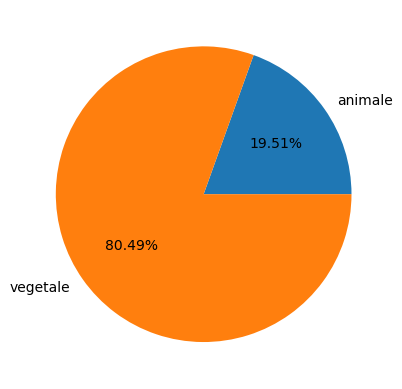

In [37]:
dispo_alimentaire2=dispo_alimentaire[['Zone', 'Origine','Disponibilité alimentaire (Kcal/personne/jour)']]
dispo_alimentaire2=dispo_alimentaire2.groupby('Origine')['Disponibilité alimentaire (Kcal/personne/jour)'].sum()
dispo_alimentaire2=dispo_alimentaire2.reset_index()
plt.pie(x=dispo_alimentaire2['Disponibilité alimentaire (Kcal/personne/jour)'], labels=dispo_alimentaire2['Origine'], autopct='%.2f%%')

In [38]:
 #Création du dataframe "DISPO_ALIM2017" issu de la fusion entre le df "Population2017" et "dispo_alimVeg"
DISPO_ALIM2017Veg=pd.merge(dispo_alimVeg, Population2017, on='Zone')
DISPO_ALIM2017Veg

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population
0,Afghanistan,1871.0,2017,36296113.0
1,Afrique du Sud,2533.0,2017,57009756.0
2,Albanie,2203.0,2017,2884169.0
3,Algérie,2915.0,2017,41389189.0
4,Allemagne,2461.0,2017,82658409.0
...,...,...,...,...
167,Émirats arabes unis,2718.0,2017,9487203.0
168,Équateur,1732.0,2017,16785361.0
169,États-Unis d'Amérique,2698.0,2017,325084756.0
170,Éthiopie,2005.0,2017,106399924.0


In [39]:
#Création de la colonne Disponibilité alimentaire (Kcal/pays/an) qui sera une conversion de la disponibilité en Kcal/pers/jour, pour cela il faut multiplier par 365 (1an pour l'année 2017) et par le nombre de population
DISPO_ALIM2017Veg['Disponibilité alimentaire (Kcal/pays/an)']=DISPO_ALIM2017Veg['Disponibilité alimentaire (Kcal/personne/jour)']*365*DISPO_ALIM2017Veg['Population']


**Déterminer la disponibilité alimentaire annuelles de produit végétaux par pays**

In [40]:
DISPO_ALIM2017Veg['Disponibilité alimentaire (Kcal/pays/an)'].sum()
print("Il y a une disponibilité alimentaire totale de produit végataux de:", DISPO_ALIM2017Veg['Disponibilité alimentaire (Kcal/pays/an)'].sum(),"Kcal")

Il y a une disponibilité alimentaire totale de produit végataux de: 6300178937197865.0 Kcal


**Déterminer les besoins caloriques annuelles par pays**

In [41]:
#Un homme a besoin entre 2400 à 2600 Kcal par jour, on choisit de prendre 2600Kcal pour plus 
#Besoin calorique journalier pour un homme => BesoinKcalHJr(Kcal/jr)
BesoinKcalHJr=2600
#Besoin calorique annuel par pays pour un an (BesoinKcalPaysPAn) 
#Déterminé par la multiplication du besoin journalier d'un homme, par 365 (1 an) et par le nombre de population
#Création d'une nouvelle colonne 'BesoinKcalPaysPAn'
DISPO_ALIM2017Veg['BesoinKcalPaysPAn'] = BesoinKcalHJr*365*DISPO_ALIM2017Veg['Population']
DISPO_ALIM2017Veg

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Année,Population,Disponibilité alimentaire (Kcal/pays/an),BesoinKcalPaysPAn
0,Afghanistan,1871.0,2017,36296113.0,2.478716e+13,3.444501e+13
1,Afrique du Sud,2533.0,2017,57009756.0,5.270808e+13,5.410226e+13
2,Albanie,2203.0,2017,2884169.0,2.319146e+12,2.737076e+12
3,Algérie,2915.0,2017,41389189.0,4.403706e+13,3.927834e+13
4,Allemagne,2461.0,2017,82658409.0,7.424916e+13,7.844283e+13
...,...,...,...,...,...,...
167,Émirats arabes unis,2718.0,2017,9487203.0,9.411969e+12,9.003356e+12
168,Équateur,1732.0,2017,16785361.0,1.061137e+13,1.592931e+13
169,États-Unis d'Amérique,2698.0,2017,325084756.0,3.201337e+14,3.085054e+14
170,Éthiopie,2005.0,2017,106399924.0,7.786612e+13,1.009735e+14


**Pourcentage de personnes pouvant être nourries de produits végétaux**

In [42]:
#Pourcentage de personnes pouvant être nourris de végétaux
#Calcul de la disponibilité alimentaire mondiale de végétaux pour un an (2017)
DISPO_ALIMmondVeg2017=DISPO_ALIM2017Veg['Disponibilité alimentaire (Kcal/pays/an)'].sum()
#Calcul du besoin calorique mondial
BesoinKcalMond2017=DISPO_ALIM2017Veg['BesoinKcalPaysPAn'].sum()
#Calcul du pourcentage de personnes pouvant être nourris de végétaux
Pourc_PersPENV=(DISPO_ALIMmondVeg2017/BesoinKcalMond2017)*100
print("Le pourcentage de personnes pouvant être nourries de produits végétaux est de:","%.2f" % Pourc_PersPENV,"%")

Le pourcentage de personnes pouvant être nourries de produits végétaux est de: 91.04 %


**Nombre théorique de personnes pouvant être nourries**

In [43]:
#Nombre théorique de personnes pouvant être nourries
#Calcul de la population mondiale en 2017
PopulationMond2017=DISPO_ALIM2017Veg['Population'].sum()
#Calcul du nombre théorique de personnes pouvant être nourries
NbretheoPersPENV=(Pourc_PersPENV*PopulationMond2017)/100
print("Nous pouvons nourrir théoriquement environ:", round(NbretheoPersPENV,3),"personnes")

Nous pouvons nourrir théoriquement environ: 6638755465.962 personnes


<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> I.4. Déterminer l'utilisation de la disponibilité intérieur: </a></h3>
</div>

## **Equation du bilan alimentaire trouvée par Julien**

***Julien a constaté qu'il y a un lien logique entre l’ensemble des 10 variables exprimées en milliers de tonnes sur
les utilisations de la disponibilité intérieure, qui peut s’exprimer avec une équation sous la forme:
A1 + A2 + … = disponibilité intérieure = B1 + B2 + …***  

***Julien a en fait trouvé l'équation du bilan alimentaire:***

*Disponibilité intérieure = Productions + Importations - Exportations + Variation des stocks*   
*Disponibilité intérieure = Semences + Aliments pour animaux + Nourriture + Pertes + Autres utilisations + Traitements*  

**Donc:**    

*Semences + Aliments pour animaux + Nourriture + Pertes + Autres utilisations + Traitements = **Disponibilité intérieure** = Productions + Importations - Exportations + Variation des stocks*

### - La part d'alimentation animale

In [44]:
dispo_alimentaire.head(5)

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [45]:
#Somme de l'alimentation animale
Somme_AlimAnim=dispo_alimentaire['Aliments pour animaux'].sum()
Somme_AlimAnim

1304245.0

In [46]:
#Somme de la disponibilité intérieure
Somme_DispInt=dispo_alimentaire['Disponibilité intérieure'].sum()
Somme_DispInt

9848994.0

In [47]:
#Pourcentage pour l'alimentation animale
Pourc_AlimAnim=(Somme_AlimAnim/Somme_DispInt)*100

print("La part d'alimentation animale représentent:","%.2f" % Pourc_AlimAnim,"%")

La part d'alimentation animale représentent: 13.24 %


### - Les pertes

In [48]:
#Somme des pertes
Somme_Pertes=dispo_alimentaire['Pertes'].sum()
Somme_Pertes

453698.0

In [49]:
#Pourcentage des pertes
Pourc_pertes=(Somme_Pertes/Somme_DispInt)*100

print("Les pertes représentent:","%.2f" % Pourc_pertes,"%")

Les pertes représentent: 4.61 %


### - La part dans l'alimentation humaine

In [50]:
#Somme de l'alimentation humaine (Nourriture)
Somme_AlimHum=dispo_alimentaire['Nourriture'].sum()
Somme_AlimHum

4876258.0

In [51]:
#Pourcentage de l'alimentation humaine
Pourc_AlimHum=(Somme_AlimHum/Somme_DispInt)*100

print("La part de l'alimentation humaine représentent:","%.2f" % Pourc_AlimHum,"%")

La part de l'alimentation humaine représentent: 49.51 %


In [52]:
 plt.pie(x=data['remboursement'], labels=data['ville'])

NameError: name 'data' is not defined

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> II. Demandes formulées par Mélanie pour chacun des pays </a></h3>
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> II.1. Pays où la proportion de personnes sous alimentées est la plus forte en 2017</a></h3>
</div>

In [ ]:
#Reprise du dataframe "proportion_pers_sous_nutris" de la question 1 et filtrage sur l'année 2017
BcpPersSousNutris2017=proportion_pers_sous_nutris.loc[proportion_pers_sous_nutris['Année']==2017]
#Somme de la population totale de chaque pays et de la population sous nutris
BcpPersSousNutris2017=proportion_pers_sous_nutris.groupby('Zone')[['Population sous nutris','Population']].sum()
BcpPersSousNutris2017

In [ ]:
#Calcul de la proportion de personnes sous nutris
BcpPersSousNutris2017['PropPersSousNutris2017']=(BcpPersSousNutris2017['Population sous nutris']/BcpPersSousNutris2017['Population'])*100
#Tri en décroissant de la proportion de personnes sous nutris
PropSousNutris2017=BcpPersSousNutris2017.sort_values('PropPersSousNutris2017', ascending=False)
PropSousNutris2017.head(15)

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> II.2. Pays qui ont bénéficié le plus d'aide en 2013</a></h3>
</div>

In [ ]:
aide_alimentaire

In [ ]:
#Filtrage de l'année 2013 et somme de la quantité d'aide alimentaire qui a été donnée
PlusAideAlim=aide_alimentaire.loc[aide_alimentaire["Année"]==2013, 'Qtité Aide en tonne'].sum()
#Aggrégation par pays bénéficiaires et tri par ordre décroissant pour déterminer les pays pays qui ont bénéficiés le plus d'aide
PlusAideAlim=(aide_alimentaire.groupby('Pays bénéficiaire').sum()).sort_values('Qtité Aide en tonne', ascending=False)
PlusAideAlim.head(15)

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> II.3. Pays ayant le plus/le moins de disponibilité par habitants</a></h3>
</div>

**Pays ayant le moins de disponibilité alimentaire**

In [ ]:

dispo_alimFaible=dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]
DISPOALIM_Faible=dispo_alimFaible.groupby('Zone').sum().sort_values('Disponibilité alimentaire (Kcal/personne/jour)')
DISPOALIM_Faible.head(15)

**Pays ayant le plus de disponibilité alimentaire**

In [ ]:
dispo_alimFort=dispo_alimentaire[['Zone','Disponibilité alimentaire (Kcal/personne/jour)']]
DISPOALIM_Fort=dispo_alimFort.groupby('Zone').sum().sort_values('Disponibilité alimentaire (Kcal/personne/jour)',ascending=False)
DISPOALIM_Fort.head(15)

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> III. Obervations et remarques de Julien </a></h3>
</div>

<div style="background-color: RGB(10,100,100) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Utilisation étonnante de certaines denrées alimentaire: l'exemple des céréales et du manioc.</a> 
</div>

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> III.1. Etude sur l'utilisation des céréales</a></h3>
</div>

In [ ]:
#Importation du fichier csv généré dans l'onglet bilan alimentaire sur le site de la FAO
FichierCereales=pd.read_csv('FAOSTAT_data_fr_4-2-2023.csv')


In [ ]:
#Extraction de la liste de céréales
ProdCereales=FichierCereales.drop_duplicates(subset=['Produit'])
ProdCereales

In [ ]:
#Création d'un dataframe de produits céréaliers issu du dataframe dispo_alimentaire d'où on extrait les colonnes les plus utiles pour l'étude
UtiliteCereales=dispo_alimentaire[['Zone', 'Produit','Aliments pour animaux','Nourriture','Autres Utilisations','Exportations - Quantité','Disponibilité intérieure']]
UtiliteCereales = UtiliteCereales.loc[(UtiliteCereales ['Produit']=='Blé et produits')|(UtiliteCereales ['Produit']=='Riz et produits')|(UtiliteCereales ['Produit']=='Orge et produits')|(UtiliteCereales ['Produit']=='Maïs et produits')|(UtiliteCereales ['Produit']=='Seigle et produits')|(UtiliteCereales ['Produit']=='Avoine')|(UtiliteCereales ['Produit']=='Milet et produits')|(UtiliteCereales ['Produit']=='Sorgho et produits')|(UtiliteCereales ['Produit']=='Céréales, Autres')]
UtiliteCereales

**Part d'utilisation des céréales dans l'alimentation humaine**


In [ ]:
#Somme des produits céréaliers utilisés dans la l'alimentation humaine
Somme_NourritureCere=UtiliteCereales['Nourriture'].sum()
#Somme des Disponiblites interieures en produits céraliers
Somme_DispoIntCere=UtiliteCereales['Disponibilité intérieure'].sum() 
#Pourcentage de l'utilisation des céréales dans l'alimentation humaine
Pourcentage_NourritureCere=(Somme_NourritureCere/Somme_DispoIntCere)*100
print("La part d'utilisation des céréales dans l'alimentation humaine est de:","%.2f" % Pourcentage_NourritureCere,"%")

**Part d'utilisation des céréales dans l'alimentation animale**


In [ ]:
#Somme des produits céréaliers utilisés dans la l'alimentation humaine
Somme_AlimAnimCere=UtiliteCereales['Aliments pour animaux'].sum()
#Somme des Disponiblites interieures en produits céraliers
Somme_DispoIntCere=UtiliteCereales['Disponibilité intérieure'].sum() 
#Pourcentage de l'utilisation des céréales dans l'alimentation humaine
Pourcentage_AlimAnimCere=(Somme_AlimAnimCere/Somme_DispoIntCere)*100
print("La part d'utilisation des céréales dans l'alimentation animale est de:","%.2f" % Pourcentage_AlimAnimCere,"%")

On constate que les céreales sont principalements utilisés pour nourrir les animaux

<div style="border: 5px solid RGB(10,100,100);" >
<h3 style="margin: auto; padding: 20px; color: RGB(10,100,100); "> III.2. Etude sur l'utilisation du manioc en Thailande </a></h3>
</div>

In [ ]:
UtiliteManioc=dispo_alimentaire[['Zone', 'Produit','Aliments pour animaux','Nourriture','Production','Exportations - Quantité','Importations - Quantité','Disponibilité intérieure']]
ThailandeUtiliteManioc=UtiliteManioc.loc[(UtiliteManioc['Zone']=='Thaïlande')&(UtiliteManioc['Produit']=='Manioc')]
ThailandeUtiliteManioc

**Part d'utilisation du manioc dans l'alimentation humaine**

In [ ]:
PourcentageManiocAlimHum=(ThailandeUtiliteManioc['Nourriture']/ThailandeUtiliteManioc['Production'])*100
print("La part d'utilisation du manioc dans l'alimentation humaine est de:","%.2f" % PourcentageManiocAlimHum,"%")

**Part d'utilisation du manioc dans l'alimentation animale**

In [ ]:
PourcentageManiocAlimAnim=(ThailandeUtiliteManioc['Aliments pour animaux']/ThailandeUtiliteManioc['Production'])*100
print("La part d'utilisation des céréales dans l'alimentation animale est de:","%.2f" % PourcentageManiocAlimAnim,"%")

**Part d'exportation du manioc**

In [ ]:
PourcentageManiocExport=(ThailandeUtiliteManioc['Exportations - Quantité']/ThailandeUtiliteManioc['Production'])*100
print("La part d'exportation du manioc est de:","%.2f" % PourcentageManiocExport,"%")

**proportion de personnes malnutris en Thaïlande**

In [ ]:
Thailande=proportion_pers_sous_nutris.loc[proportion_pers_sous_nutris['Zone']=='Thaïlande']
prop_PersSousNutrisThailande=(Thailande['Population sous nutris']/Thailande['Population'])*100
print("La proportion de personnes malnutris en Thaïlande est de:","%.2f" % prop_PersSousNutrisThailande,"%")

<div style="background-color: RGB(10,100,100) ; ">
<h2 style="margin: auto; padding: 20px; color:#fff; "> Informations supplémentaire qui mettent en relief les pays les plus en difficultés.</a> 
</div>

In [ ]:
#Creation du dataframe A qui permettra l'étude des pays les plus en difficultés
A=dispo_alimentaire[['Zone','Production','Importations - Quantité','Exportations - Quantité','Pertes','Variation de stock']]
A

In [ ]:
B=A.groupby('Zone')['Production','Importations - Quantité', 'Exportations - Quantité','Pertes','Variation de stock'].sum()
B

In [ ]:
# Création et calcul des taux de dépendance des importations (TDI) pour chaque pays
B['TDI'] =(B['Importations - Quantité']/(B['Production']+B['Importations - Quantité']-B['Exportations - Quantité']+B['Variation de stock']))*100
B.head(10)

In [ ]:
# Création et calcul des taux de suffisance alimentaire (TAS) pour chaque pays
B['TAS'] =(B['Production']/(B['Production']+B['Importations - Quantité']-B['Exportations - Quantité']+B['Variation de stock']))*100
B

In [ ]:
#Dataframe "proportion_pers_sous_nutris2017" qui permettait de déterminer la proportion de personnes sous-nutris dans la question 1
proportion_pers_sous_nutris2017=proportion_pers_sous_nutris.loc[proportion_pers_sous_nutris['Année']==2017]

In [ ]:
#Création de du df "C" qui fusionne les df "proportion_pers_sous_nutris2017" et "B" pour déterminer le TDI, le TAS et les pertes en fonction de la proportion de personnes sous-nutris
C=pd.merge(B,proportion_pers_sous_nutris2017, on='Zone', how='inner')
C['PropPSN']=(C['Population sous nutris']/C['Population'])*100
C

In [ ]:
#Suppression des colonnes devenues inutiles
C=C.drop(columns=['Population sous nutris','Population','Année','Variation de stock'])
C

In [ ]:
#Remplacement des valeurs NaN par 0
C['PropPSN']=C['PropPSN'].fillna(0)
C

In [ ]:
C['PropPSN'] = pd.to_numeric(C['PropPSN'], errors='coerce') # Convertir la colonne en numérique
C = C.dropna(subset=['PropPSN']) # Supprimer les valeurs manquantes dans la colonne

In [ ]:
#Pays ayant la plus grande proportion de personnes sous-nutris en fonction des pertes, des TDI, TAS 
sousnutris=C.sort_values(['PropPSN'], ascending=False)
sousnutris.head(20)

In [ ]:
TDIFort=C.sort_values(['TDI'], ascending=False)
TDIFort.head(10)

In [ ]:
TASFaible=C.sort_values(['TAS'])
TASFaible.head(10)